# Ankith Bachhu, Shaunak Roy, Daniel Lu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.formula.api as smf

# import sklearn learn's LinearRegression
from sklearn.linear_model import LinearRegression

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
data = pd.read_csv("gap-every-five-years.tsv", sep='\t')

data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1: Make a scatter plot of life expectancy across time.

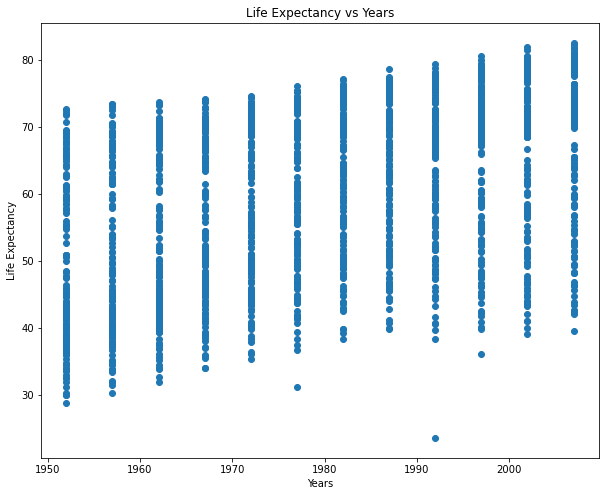

In [3]:
# creating scatterplot of lifeExp vs years
plt.figure(figsize=(10,8))
plt.scatter(data["year"], data["lifeExp"])
plt.title("Life Expectancy vs Years")
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.show()

This scatter plot shows the relationship between life expectancy and years.

## Question 1: General Trends

Yes, there is a general trend of life expectancy increasing over time. This trend does seem to be linear, as there seems to be a relatively constant increase for each year.

## Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

Text(0.5, 1.0, 'Life Expectancy vs Year')

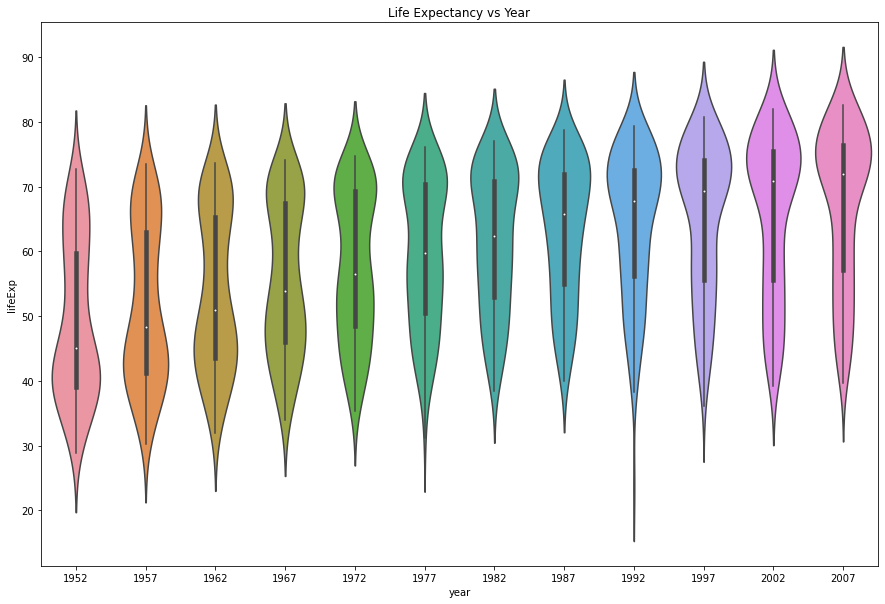

In [4]:
# creating a violin plot of life expectancy vs years
plt.figure(figsize=(15,10))
sns.violinplot(data["year"], data["lifeExp"])
plt.title("Life Expectancy vs Year")

This violin plot shows the relationship between life expectancy vs year. 

Text(0.5, 1.0, 'Life Expectancy vs Year')

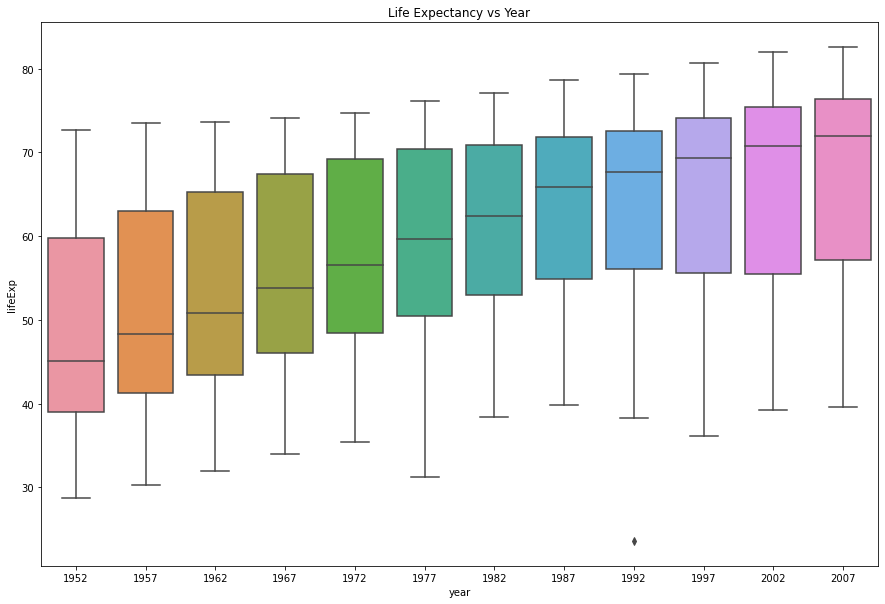

In [5]:
plt.figure(figsize=(15,10))
sns.boxplot(data["year"], data["lifeExp"])
plt.title("Life Expectancy vs Year")

This graph is a boxplot, that also shows the life expectancy vs year

From 1952 - 1972, the data shows a bimodal distribution, while at 1977, there is still a bimodal distribution, but a shift to unimodal begins. From 1982 - 2007, there is a unimodal distribution, with a skew left (more countries had a higher life expectancy). There is some outliers towards the lower life expectancies. Looking at the boxplots, the distribution between life expectancy and years do not appear to be symmetric around its center.

### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without actually writing the code and fitting the model yet. I am testing your intuition.)

Looking at the violin plot and scatter plot, we should be able to reject the null hypothesis, as there appears to be a positive correlation between the year and life expectancy of the countries. 

### Question 4: What would a violin plot of residuals (errors) from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively). You would answer this question in the context of the variables in Question 3

I think that the distribution should be relatively similar to the violin plot of life expectancy vs year, because creating the violin plot of residuals vs year is a linear transformation. This means that the relative probabilities stay the same, because the values are shifted by a constant amount (predicted y value) for each year.

### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? You would answer this question as a general property of the residuals of the linear regression. We are looking to see if the Question 3 model fits the general assumptions

Looking at the scatter plot, if we were to estimate a best fit line, there would appear to be a relatively equal amount of points above and below the regression line. Therefore, since it is similar to a normal distribution, a violin plot of the residual errors would be unimodal and also symmetric around the center.

### Exercise 2: Fit a linear regression model 



In [6]:
# creating a linear regression model
lr = LinearRegression()
x = data["year"].values.reshape(-1, 1)
y = data["lifeExp"].values.reshape(-1, 1)
lr.fit(x, y)

LinearRegression()

In [7]:
# printing the intercept and slope
print(lr.intercept_)
print(lr.coef_)

[-585.65218744]
[[0.32590383]]


## Question 6: On average, by how much does life expectancy increase every year around the world?

Life expectancy increases by 0.3259 years on average every year around the world.

### Finding the p-value

In [8]:
# creating the ordinary least squares relationship between lifeExp and year
result1 = smf.ols(formula="lifeExp ~ year ", data=data).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.55e-80
Time:                        18:52:05   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

Based on the ordinary least square regression results, the F-statistic is 398.6, which has a p-value of 0. Thus for any acceptable alpha i.e. 0.1, 0.05, 0.01, reject the null hypothesis. 0 < any acceptable alpha. There is significant evidence to conclude there is a relationship between year a nd life expectancy. 

### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

In [9]:
# creating the years
x = np.linspace(1952, 2007, 12).reshape(-1, 1)
# making the predictions
y_hat = lr.predict(x)
print(y_hat)

[[50.51208411]
 [52.14160324]
 [53.77112238]
 [55.40064152]
 [57.03016066]
 [58.6596798 ]
 [60.28919894]
 [61.91871807]
 [63.54823721]
 [65.17775635]
 [66.80727549]
 [68.43679463]]


In [10]:
# mapping each prediction to its correspondent year
predictions = list(zip(data['year'].unique(), y_hat))

In [11]:
predictions

[(1952, array([50.51208411])),
 (1957, array([52.14160324])),
 (1962, array([53.77112238])),
 (1967, array([55.40064152])),
 (1972, array([57.03016066])),
 (1977, array([58.6596798])),
 (1982, array([60.28919894])),
 (1987, array([61.91871807])),
 (1992, array([63.54823721])),
 (1997, array([65.17775635])),
 (2002, array([66.80727549])),
 (2007, array([68.43679463]))]

In [12]:
data['residuals'] = 0
for i in range(len(predictions)):
    # find all the years at specific interval
    year_index = data['year'] == predictions[i][0]
    # calculate the residual
    data.loc[year_index, "residuals"] = data.loc[year_index, "lifeExp"] - predictions[i][1]

Text(0.5, 1.0, 'Residuals vs Year')

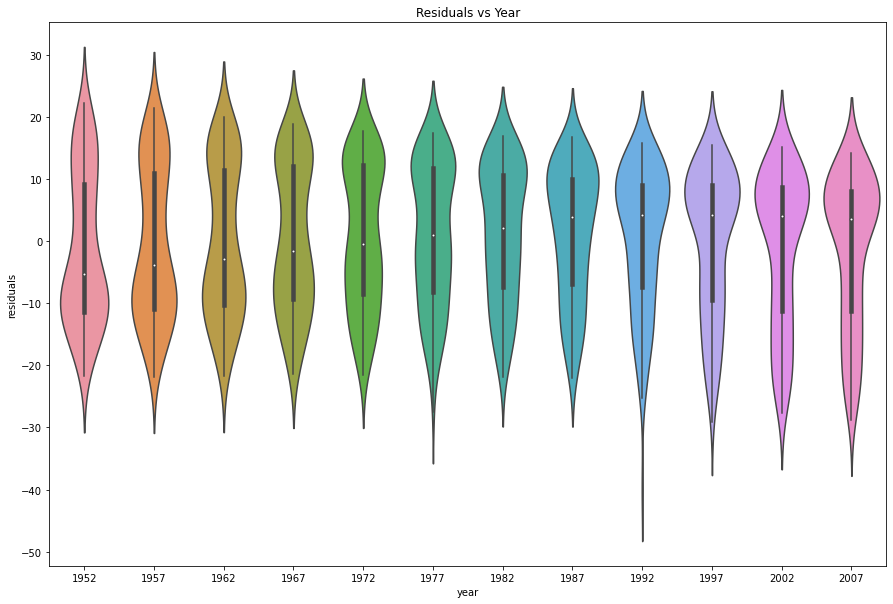

In [13]:
# creating the violin plot
plt.figure(figsize=(15,10))
sns.violinplot(data['year'], data['residuals'])
plt.title("Residuals vs Year")

### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?
Yes, my prediction made in Question 4 held true, as the distributions between the violin plots look very similar. The only notable difference is that the range of values has changed because a linear transformation was done.

### Exercise 4:  Make a boxplot (or violin plot) of model residuals vs. continent.

Text(0.5, 1.0, 'Residuals vs Continent')

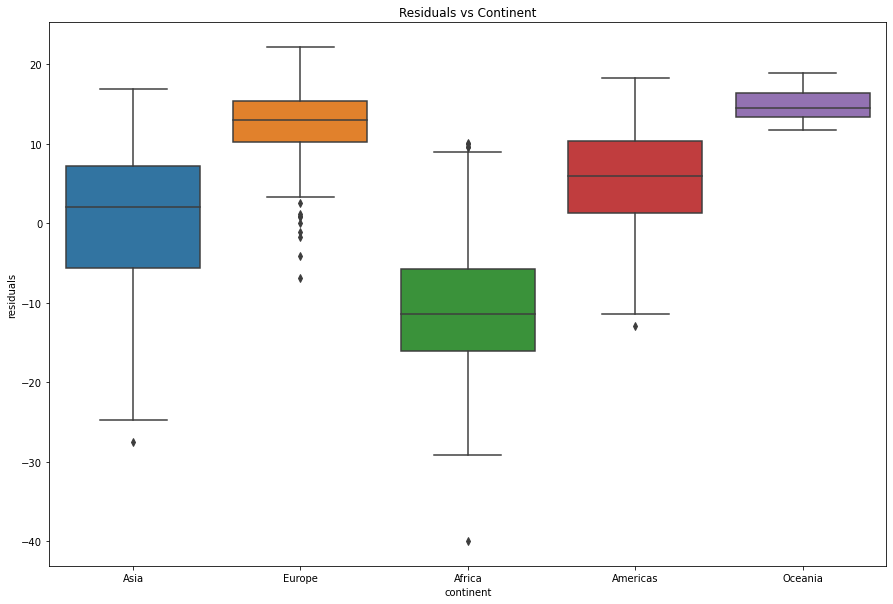

In [14]:
# creating a box plot of life expectancy vs years
plt.figure(figsize=(15,10))
sns.boxplot(data['continent'], data['residuals'])
plt.title("Residuals vs Continent")

This graph shows a boxplot for the residuals vs the continent. It can be seen in the graph that there are some noticeable outliers in the negative residuals, which infers that the model predicted higher life expectancies.

### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, there appears to be a dependence between model residual and continent. It can be seen that the residual values and ranges differ between each of the continents.  It can be notably seen that the ranking for the highest to lowest life dependency by continent goes by Oceania, Europe, Americas, Asia, Africa. 

I would suggest to perform a linear regression anaylysis of life expectancy across time for each continent separately, in order to get more information about the life expetancy increase over the years. 

### Exercise 5:  As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line

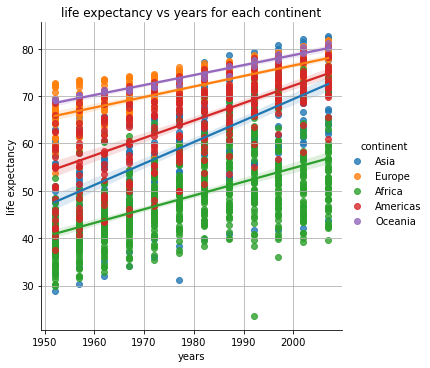

In [15]:
# create scatter plot for life expectancy vs year

# plots each continent as its own color and then adds a regression line for it
sns.lmplot(data = data, x="year", y="lifeExp", hue="continent")

plt.xlabel("years")
plt.ylabel("life expectancy")
plt.title(f"life expectancy vs years for each continent")
plt.grid(True)
plt.show()


This scatterplot show the relationship between life expectancy vs years, for each continent. The best fit lines for each graph is also displayed. From the graphs, it can be seen there is an increase in life expectancy for every country between each interval.

### Question 10:  Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, our regression model should include an interaction term for continent and year, because there is a notable difference between the linear regression lines for each continent. Each continent also has a positive correlation between life expectancy and year. 

### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this. 

In [16]:
# creating the ordinary least square relationship for lifeExp with an interaction term of continent and year
result2 = smf.ols(formula="lifeExp ~ continent * year ", data=data).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:52:06   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11:  Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

To test which parameters are significantly different from zero, I need to select an alpha/significance value. I will be using alpha = 0.05. At alpha = 0.05, there are two parameters **not significantly** different from zero. This is the parameter for continent[T.Oceania] and continent[T.Oceania]:year. They both have values which are greater than 0.05. They are respectively 0.287 and 0.360.

### Question 12:  On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit).

In [17]:
# printing the params of the model
result2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
continent[T.Americas]:year      0.078122
continent[T.Asia]:year          0.163593
continent[T.Europe]:year       -0.067597
continent[T.Oceania]:year      -0.079257
dtype: float64

From the model parameters, it can be seen that: 
* Asia increased by 0.163593 years on average
* Europe: decreased by -0.067597 years on average
* Africa: increased by 0.289529 years on average
* Americas: increased by 0.078122 years on average
* Oceania: decreased by -0.079257 years on average

### Exercise 7: Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent). The F-test is obtained by calling fvalue from the results of exercises 2 and 6.

In [18]:
# result from fitting life exp vs years F value and corresponding p-value
print(f"F value for life exp vs year: {result1.fvalue}")
print(f"p value for life exp vs year: {result1.f_pvalue}")

# result from fitting life exp vs years and continent (interaction) F value and corresponding p-value
print(f"F value for life exp vs year and continent: {result2.fvalue}")
print(f"p value for life exp vs year and continent: {result2.f_pvalue}")

F value for life exp vs year: 398.6047457117622
p value for life exp vs year: 7.546794625598736e-80
F value for life exp vs year and continent: 424.2729023400693
p value for life exp vs year and continent: 0.0


Since the fvalues are 398 and 424, they both correspond to a p-value of 0. This results in rejecting the following null hypothesises at any reasonable alpha: years not being significant for part a, and years and continent not being significant for part b.

### Question 13:  Is the interaction model significantly better than the year-only model? Why?
From the F-Statistics value above, we can see that the interaction model's F-statistic value of 424.273 is greater than the year-only model's F-statistic value of 398.605. This implies that the interaction model was better at explaining the correlation between independent and dependent variables.

### Exercis 8: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

Text(0, 0.5, 'residuals')

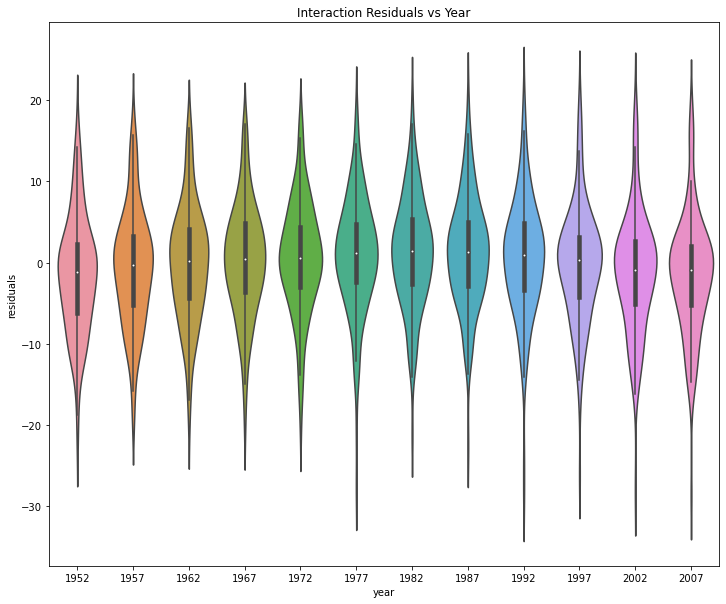

In [19]:
plt.figure(figsize=(12,10))

# getting the residuals of the interaction model
resids = result2.resid

# plotting
sns.violinplot(data["year"], resids)
plt.title("Interaction Residuals vs Year")
plt.xlabel("year")
plt.ylabel("residuals")

In the Interaction Residuals vs Year plot, the median value is close to 0 for all the years, as well as unimodal. This means that the interaction model does a good job of finding the linear relationship between the independent variable and dependent variable. Due to the fact that the violin plots show a normal distribution centered at 0, it does further prove the linear regression assumptions and results. 

Text(0, 0.5, 'residuals')

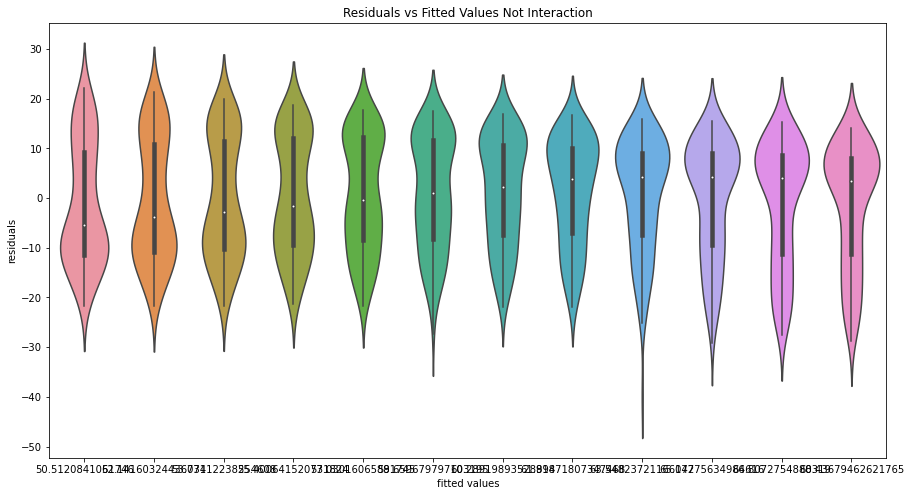

In [20]:
plt.figure(figsize=(15,8))

# fitted values for the interaction model
data["fitted_values"] = result1.fittedvalues

# plotting residuals vs fitted values
sns.violinplot(x=data["fitted_values"], y=data["residuals"])
plt.title("Residuals vs Fitted Values Not Interaction")
plt.xlabel("fitted values")
plt.ylabel("residuals")

The graph indicates that the data's central tendency is approximately around 0, but it still noticeably deviates. It can be seen that, some violin plots have a bimodal distribution, while others show a unimodal but skewed left distribution. This suggests that while a linear model could provide predictions for the values, the violin plots incorporating interaction terms offer a more accurate linear representation. The interaction term plots display a unimodal distribution centered at 0, indicating a normal distribution characteristic of linear models.